<a href="https://colab.research.google.com/github/NaHyeonMaeng/CODE_Practice/blob/main/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import random

#랜덤 시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

#구글 드라이브 폴더 마운트
from google.colab import drive, files
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#데이콘 사이트에서 다운로드한 csv 파일 읽어오기
drive_path = "/gdrive/My Drive/"
train = pd.read_csv(drive_path + "mnist_data/train.csv")
test = pd.read_csv(drive_path + "mnist_data/test.csv")
submission = pd.read_csv(drive_path + "mnist_data/sample_submission.csv")

print(train.shape, test.shape, submission.shape)

(60000, 786) (10000, 785) (10000, 2)


In [ ]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_images = train.loc[:, 'pixel1':].values.reshape(-1,28,28)
train_images.shape

(60000, 28, 28)

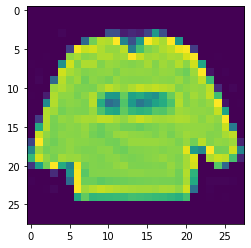

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0]);

In [ ]:
y_train = train.loc[:, 'label']
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [ ]:
target_values = {0: 'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
print(y_train[0])
print(target_values[y_train[0]])

2
Pullover


In [ ]:
test_images = test.loc[:,'pixel1':].values.reshape(-1, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

In [ ]:
x_train = train_images / 255.
x_test = test_images / 255.
print("최소값:", x_train[0].min())
print("최댓값:", x_train[0].max())

최소값: 0.0
최댓값: 1.0


In [ ]:
#채널 차원 추가
print("변환 전:", x_train.shape, x_test.shape)
x_train = np.expand_dims(x_train, axis = -1)
x_tset = np.expand_dims(x_test, axis = -1)
print("변환 후:", x_train.shape, x_test.shape)

변환 전: (60000, 28, 28) (10000, 28, 28, 1)
변환 후: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train, shuffle = True, random_state = SEED)
print("학습 데이터셋 크기:", x_tr.shape, y_tr.shape)
print("검증 데이터셋 크기:", x_val.shape, y_val.shape)

학습 데이터셋 크기: (48000, 28, 28, 1) (48000,)
검증 데이터셋 크기: (12000, 28, 28, 1) (12000,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape = [28,28]))
mlp_model.add(Dense(units=64, activation = 'relu'))
mlp_model.add(Dense(units=10, activation = 'softmax'))
mlp_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_history = mlp_model.fit(x_tr, y_tr, batch_size = 64, epochs = 20, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/20
750/750 - 4s - loss: 0.5708 - acc: 0.8030 - val_loss: 0.4541 - val_acc: 0.8406 - 4s/epoch - 5ms/step
Epoch 2/20
750/750 - 4s - loss: 0.4202 - acc: 0.8516 - val_loss: 0.3975 - val_acc: 0.8601 - 4s/epoch - 6ms/step
Epoch 3/20
750/750 - 3s - loss: 0.3842 - acc: 0.8635 - val_loss: 0.3922 - val_acc: 0.8631 - 3s/epoch - 4ms/step
Epoch 4/20
750/750 - 3s - loss: 0.3605 - acc: 0.8714 - val_loss: 0.3927 - val_acc: 0.8614 - 3s/epoch - 4ms/step
Epoch 5/20
750/750 - 3s - loss: 0.3427 - acc: 0.8765 - val_loss: 0.3712 - val_acc: 0.8708 - 3s/epoch - 4ms/step
Epoch 6/20
750/750 - 5s - loss: 0.3276 - acc: 0.8826 - val_loss: 0.3545 - val_acc: 0.8784 - 5s/epoch - 7ms/step
Epoch 7/20
750/750 - 3s - loss: 0.3149 - acc: 0.8861 - val_loss: 0.3454 - val_acc: 0.8777 - 3s/epoch - 4ms/step
Epoch 8/20
750/750 - 4s - loss: 0.3030 - acc: 0.8900 - val_loss: 0.3534 - val_acc: 0.8735 - 4s/epoch - 5ms/step
Epoch 9/20
750/750 - 5s - loss: 0.2935 - acc: 0.8925 - val_loss: 0.3425 - val_acc: 0.8813 - 5s/epoch - 6

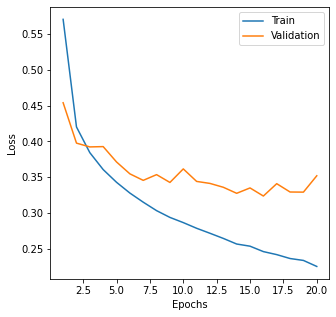

In [ ]:
# 손실실함수 그래프

def plot_loss_curve(history, total_epoch = 10, start = 1):
  plt.figure(figsize = (5,5))
  plt.plot(range(start, total_epoch + 1), history.history['loss'][start-1: total_epoch], label = 'Train')

  plt.plot(range(start, total_epoch + 1), history.history['val_loss'][start-1:total_epoch], label = 'Validation')

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_loss_curve(history=mlp_history, total_epoch=20, start =1)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=16, kernel_size = (3,3), activation = 'relu', input_shape=[28,28,1]))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                173120    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
________________________________________________

In [ ]:
cnn_history = cnn_model.fit(x_tr, y_tr, batch_size = 64, epochs = 20, validation_data = (x_val, y_val), verbose=2)

Epoch 1/20
750/750 - 19s - loss: 0.4743 - acc: 0.8365 - val_loss: 0.3534 - val_acc: 0.8768 - 19s/epoch - 26ms/step
Epoch 2/20
750/750 - 21s - loss: 0.3202 - acc: 0.8868 - val_loss: 0.3037 - val_acc: 0.8935 - 21s/epoch - 28ms/step
Epoch 3/20
750/750 - 19s - loss: 0.2789 - acc: 0.8996 - val_loss: 0.2903 - val_acc: 0.8983 - 19s/epoch - 26ms/step
Epoch 4/20
750/750 - 19s - loss: 0.2506 - acc: 0.9093 - val_loss: 0.2785 - val_acc: 0.8985 - 19s/epoch - 26ms/step
Epoch 5/20
750/750 - 23s - loss: 0.2287 - acc: 0.9161 - val_loss: 0.2805 - val_acc: 0.9023 - 23s/epoch - 31ms/step
Epoch 6/20
750/750 - 26s - loss: 0.2109 - acc: 0.9240 - val_loss: 0.2628 - val_acc: 0.9066 - 26s/epoch - 34ms/step
Epoch 7/20
750/750 - 18s - loss: 0.1912 - acc: 0.9311 - val_loss: 0.2618 - val_acc: 0.9053 - 18s/epoch - 24ms/step
Epoch 8/20
750/750 - 19s - loss: 0.1756 - acc: 0.9360 - val_loss: 0.2560 - val_acc: 0.9078 - 19s/epoch - 26ms/step
Epoch 9/20
750/750 - 24s - loss: 0.1646 - acc: 0.9400 - val_loss: 0.2484 - val_a

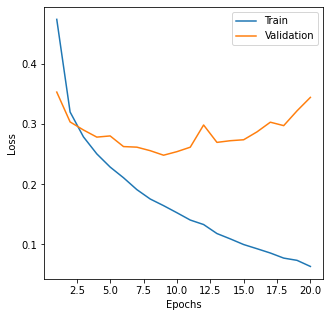

In [ ]:
# 손실함수 그래프
plot_loss_curve(history=cnn_history, total_epoch=20, start=1)

In [ ]:
# 드람아웃 레이어 추가하기
from tensorflow.keras.layers import Dropout
def build_cnn():
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size = (3,3), activation = 'relu', input_shape = [28,28,1]))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=64, activation = 'relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(units=10, activation = 'softmax'))

  model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['acc'])
  return model

cnn_model = build_cnn()
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                173120    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)
cnn_history = cnn_model.fit(x_tr, y_tr, batch_size = 64, epochs = 100, validation_data = (x_val, y_val), callbacks = [early_stopping], verbose = 0)

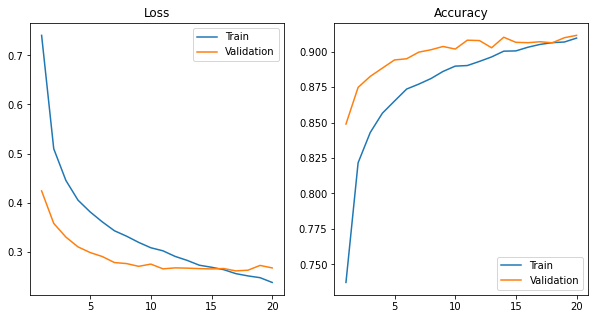

In [ ]:
# 20 epoch까지 손실 함수와 정확도를 그래프로 나타내기
start = 1
end = 20

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].plot(range(start, end+1), cnn_history.history['loss'][start-1 : end], label = 'Train')
axes[0].plot(range(start, end+1), cnn_history.history['val_loss'][start-1 : end], label = 'Validation')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(range(start, end+1), cnn_history.history['acc'][start-1:end], label = 'Train')
axes[1].plot(range(start, end+1), cnn_history.history['val_acc'][start-1:end], label = 'Validation')
axes[1].set_title('Accuracy')
axes[1].legend()
plt.show()

In [ ]:
# 검증 데이터를 입력하여 모델 성능 평가
cnn_model.evaluate(x_val, y_val)

375/375 [==============================] - 4s 11ms/step - loss: 0.2787 - acc: 0.9095


[0.27871841192245483, 0.909500002861023]

In [ ]:
y_pred_proba = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_proba, axis = -1)
y_pred_classes[:10]

313/313 [==============================] - 2s 7ms/step


array([0, 1, 6, 6, 3, 6, 8, 6, 5, 0])

In [ ]:
submission['label'] = y_pred_classes
submission_filepath = drive_path + 'mnist_cnn_submission1.csv'
submission.to_csv(submission_filepath, index = False)

In [ ]:
#사용자 정의 콜백 함수
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc') > 0.91):
      self.model.stop_training = True
      print("\n")
      print("목표 정화도 달성: 검증 정확도 $.4f" % logs.get('val_acc'))

my_callback = my_callback()

In [ ]:
# Best Model 저장
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_path = drive_path + "best_cnn_model.h5"
save_best_model = ModelCheckpoint(best_model_path, monitor = 'val_loss', save_best_only = True, save_weights_only = False)

In [ ]:
# CNN 모델 학습
cnn_model = build_cnn()
cnn_history = cnn_model.fit(x_tr, y_tr, batch_size = 64, epochs = 30, validation_data = (x_val, y_val), callbacks=[my_callback, save_best_model], verbose =2)

Epoch 1/30
750/750 - 21s - loss: 0.6943 - acc: 0.7544 - val_loss: 0.4083 - val_acc: 0.8558 - 21s/epoch - 28ms/step
Epoch 2/30
750/750 - 20s - loss: 0.4800 - acc: 0.8314 - val_loss: 0.3441 - val_acc: 0.8752 - 20s/epoch - 26ms/step
Epoch 3/30
750/750 - 18s - loss: 0.4218 - acc: 0.8522 - val_loss: 0.3282 - val_acc: 0.8842 - 18s/epoch - 24ms/step
Epoch 4/30
750/750 - 19s - loss: 0.3883 - acc: 0.8642 - val_loss: 0.3135 - val_acc: 0.8859 - 19s/epoch - 26ms/step
Epoch 5/30
750/750 - 19s - loss: 0.3623 - acc: 0.8716 - val_loss: 0.2955 - val_acc: 0.8927 - 19s/epoch - 26ms/step
Epoch 6/30
750/750 - 19s - loss: 0.3442 - acc: 0.8759 - val_loss: 0.2910 - val_acc: 0.8944 - 19s/epoch - 26ms/step
Epoch 7/30
750/750 - 19s - loss: 0.3275 - acc: 0.8822 - val_loss: 0.2770 - val_acc: 0.8986 - 19s/epoch - 26ms/step
Epoch 8/30
750/750 - 20s - loss: 0.3171 - acc: 0.8862 - val_loss: 0.2748 - val_acc: 0.9007 - 20s/epoch - 27ms/step
Epoch 9/30
750/750 - 18s - loss: 0.3022 - acc: 0.8895 - val_loss: 0.2662 - val_a

TypeError: ignored

In [ ]:
from tensorflow.keras.models import load_model

# ModelCheckPoin에 저장해둔 모델 로딩
best_model = load_model(drive_path + "best_cnn_model.h5")
best_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                173120    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                      

In [ ]:
y_pred_proba = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_proba, axis = 1)
submission['label'] = y_pred_classes
submission_filepath = drive_path + 'mnist_cnn_submission2.csv'
submission.to_csv(submission_filepath, index = False)

313/313 [==============================] - 2s 6ms/step


In [ ]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

# 랜덤 시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# 케라스에서 불러오기
from tensorflow.keras import datasets
fashion_mnist = datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 피처 스케일링
x_train = x_train/255.
x_test = x_test/255.

# 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis =-1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [ ]:
# 오토 인코더 모델 정의
def Autoencoder():
  model = Sequential()

  # Encoder 부분
  model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = [28, 28, 1]))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(64,activation = 'relu'))

  # Decoder 부분
  model.add(Dense(units = 28*28, activation = 'sigmoid'))
  model.add(Reshape((28,28)))

  # Compile
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')

  return model

ae_model = Autoencoder()
ae_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 2704)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                173120    
                                                                 
 dense_19 (Dense)            (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                     

In [ ]:
history = ae_model.fit(x_train, x_train, batch_size = 64, epochs = 20, validation_data=(x_test, x_test), verbose=0)

ae_images = ae_model.predict(x_test)
ae_images.shape

313/313 [==============================] - 53s 10ms/step


(10000, 28, 28)

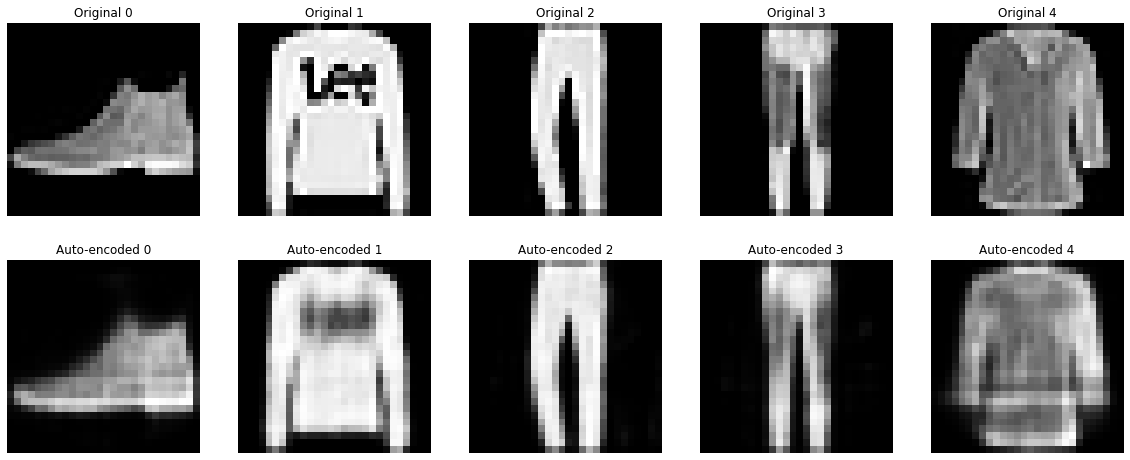

In [ ]:
num = 5
plt.figure(figsize = (20,8))

for i in range(num):

  #원본이미지
  ax = plt.subplot(2, num, i+1)
  plt.imshow(x_test[i].reshape((28,28)), cmap = 'gray')
  plt.title("Original %s" % str(i))
  plt.axis('off')

  #복원이미지
  ax = plt.subplot(2, num, i + num +1)
  plt.imshow(ae_images[i], cmap = 'gray')
  plt.title("Auto-encoded %s" % str(i))
  plt.axis('off')

plt.show()